<a href="https://colab.research.google.com/github/deniseiras/Artificial-Intelligence/blob/main/Acoes_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Rede RNN (LSTM) - Ações

Denis M. A. Eiras

Atualizado: 05/04/2021

O dataset está disponivél através de API e o notebook pode ser executador por completo.

Tempo aproximado de execução de 3 horas.

## Inicialização das bibliotecas e parâmetros gerais


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Activation
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from keras.models import Model
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from google.colab import drive
import pickle
#import glob
!pip install yfinance
import yfinance as yf
from IPython import display
import sys
import warnings
from time import time
from datetime import datetime, timedelta

warnings.filterwarnings('ignore')
print("")
print("Python version:")
print (sys.version)
print("\nTensorflow version:")
print(tf.__version__)
print('')

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 24.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.



Python version:
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

Tensorflow version:
2.8.0



In [ ]:
msft = yf.Ticker("VALE3.SA")

# get stock info
print(msft.info)

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
print(msft.actions)

# show dividends
print(msft.dividends)

# show splits
print(msft.splits)

# show financials
print(msft.financials)
print(msft.quarterly_financials)

# show major holders
print(msft.major_holders)

# show institutional holders
print(msft.institutional_holders)

# show balance sheet
print(msft.balance_sheet)
print(msft.quarterly_balance_sheet)

# show cashflow
print(msft.cashflow)
print(msft.quarterly_cashflow)

# show earnings
print(msft.earnings)
print(msft.quarterly_earnings)

# show sustainability
print(msft.sustainability)

# show analysts recommendations
print(msft.recommendations)

# show next event (earnings, etc)
print(msft.calendar)

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
print(msft.isin)

# show options expirations
print(msft.options)

# get option chain for specific expiration
# opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

{'zip': '22250-145', 'sector': 'Basic Materials', 'longBusinessSummary': 'Vale S.A., together with its subsidiaries, produces and sells iron ore and iron ore pellets for use as raw materials in steelmaking in Brazil and internationally. The company operates through Ferrous Minerals and Base Metals segments. The Ferrous Minerals segment produces and extracts iron ore and pellets, manganese, ferroalloys, and other ferrous products; and provides related logistic services. The Base Metals segment produces and extracts nickel and its by-products, such as gold, silver, cobalt, precious metals, and others, as well as copper. The company was formerly known as Companhia Vale do Rio Doce and changed its name to Vale S.A. in May 2009. Vale S.A. was founded in 1942 and is headquartered in Rio de Janeiro, Brazil.', 'city': 'Rio De Janeiro', 'phone': '55 21 3485 3900', 'state': 'RJ', 'country': 'Brazil', 'companyOfficers': [], 'website': 'https://www.vale.com', 'maxAge': 1, 'address1': 'Praia de Bot

## Leitura e tratamento do Dataset



Requisição de dados para API *Yahoo Finance* e visualização de informações básicas.

---



[*********************100%***********************]  3 of 3 completed
Data Inicial:  2000-01-03 00:00:00
Data Final  :  2022-04-27 00:00:00
Tamanho     :  5607

Python version:
3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]

Tensorflow version:
2.8.0



Text(0.5, 1.0, 'Preço de Encerramento')

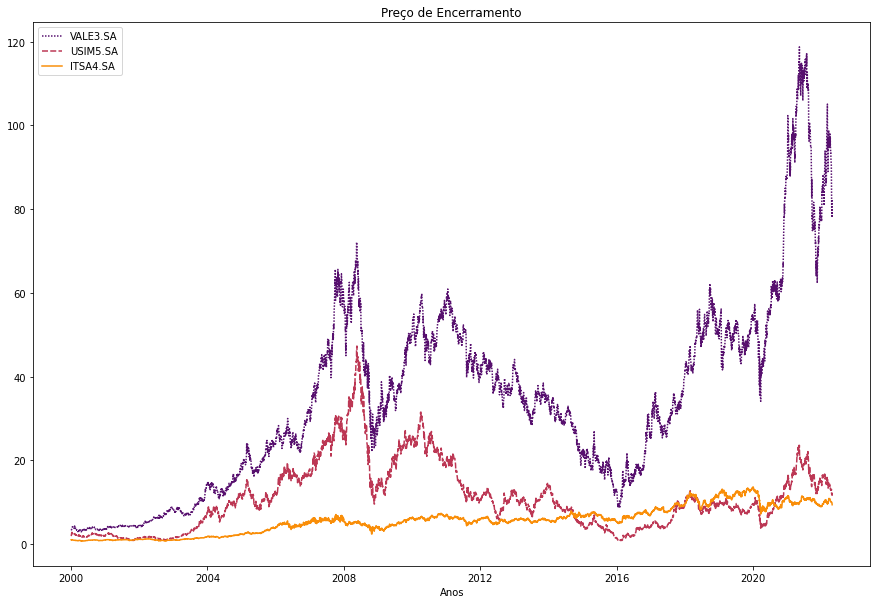

In [ ]:
# data = yf.download("ITSA4.SA, USIM5.SA, VALE3.SA", start="2015-01-21", end="2021-08-01")

# CMIG4.SA  - 2006 - tá com um pico em 2003 e uma queda forte em 2006 ...
# TAEE11.SA - 2007
# arr_acoes = ["CMIG4.SA", "TAEE11.SA"]  # 2002 e 2007

# UGPA3.SA  - 2002
# arr_acoes = ["UGPA3.SA"]

# demais    - 2000
arr_acoes = ["VALE3.SA", "USIM5.SA", "ITSA4.SA"]


data = yf.download(arr_acoes)


# CMIG4, UGPA3 zoado a partir de 


df = data["Close"]
df.dropna(axis=0, inplace=True)
print("Data Inicial: ", df.index.min())
print("Data Final  : ", df.index.max())
print("Tamanho     : ", len(df))
print('')

np.random.seed(seed=0)
print("Python version:")
print (sys.version)
print("\nTensorflow version:")
print(tf.__version__)
print("")

fig, ax = plt.subplots(figsize=(15, 10), nrows=1, ncols=1)
sns.lineplot(data=df, palette='inferno', ax=ax,hue_order=arr_acoes)
ax.set_xlabel('Anos')
ax.set_title('Preço de Encerramento')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5607 entries, 2000-01-03 to 2022-04-27
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ITSA4.SA  5607 non-null   float64
 1   USIM5.SA  5607 non-null   float64
 2   VALE3.SA  5607 non-null   float64
dtypes: float64(3)
memory usage: 175.2 KB


In [ ]:
df

,ITSA4.SA,USIM5.SA,VALE3.SA
Date,,,
2000-01-03,1.032093,2.133333,3.500000
2000-01-04,0.933551,2.055555,3.416666
2000-01-05,1.011347,2.251111,3.416666
2000-01-06,1.026906,2.455555,3.416666
2000-01-07,1.021720,2.553333,3.541666
...,...,...,...
2022-04-20,10.060000,12.270000,85.400002
2022-04-22,9.910000,11.940000,80.449997
2022-04-25,9.880000,12.170000,79.080002


In [ ]:
df.describe()

,ITSA4.SA,USIM5.SA,VALE3.SA
count,5607.000000,5607.000000,5607.000000
mean,5.604513,10.915151,34.049869
std,3.294816,8.160871,23.194712
min,0.720909,0.811111,2.833333
25%,2.629504,4.170000,16.240000
50%,5.665825,9.600000,32.009998
75%,7.445207,15.010556,48.210001
max,13.666666,47.299999,118.720001


Seleção e visualização do dataset de Treino e Teste.

---



Data Inicial Treino:  2000-01-03 00:00:00
Data Final   Treino:  2022-04-11 00:00:00
Tamanho      Treino:  5597

Data Inicial Teste:  2022-04-12 00:00:00
Data Final   Teste:  2022-04-27 00:00:00
Tamanho      Teste:  10


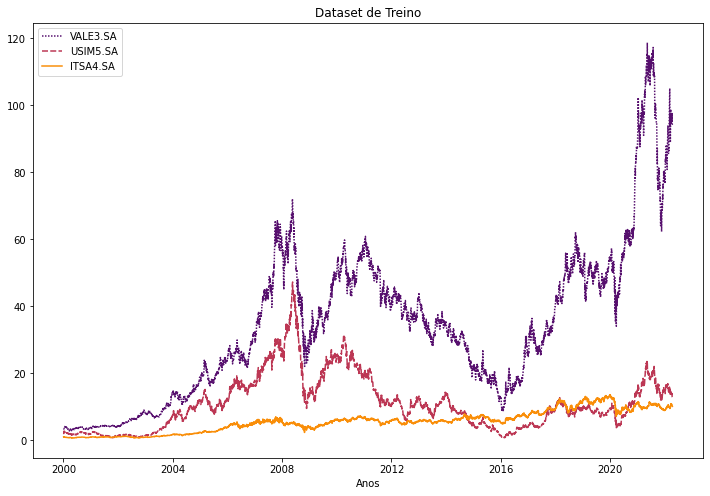

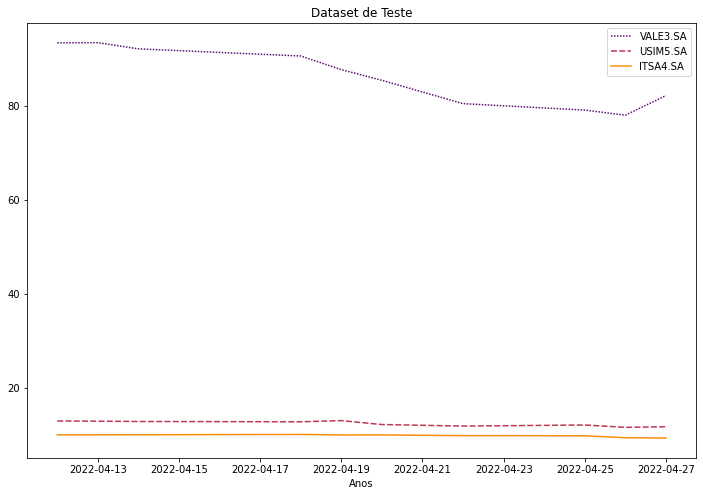

In [ ]:
# old
# data_corte_treino = "2020-10-04"

# prev prox dia
today = datetime.today()
data_corte_treino = "2021-04-26"

data_corte_treino = today - timedelta(days=17)

data_treino = df.loc[(df.index <= data_corte_treino)]
data_teste = df.loc[(df.index > data_corte_treino)]


print("Data Inicial Treino: ", data_treino.index.min())
print("Data Final   Treino: ", data_treino.index.max())
print("Tamanho      Treino: ", len(data_treino))
print('')

print("Data Inicial Teste: ", data_teste.index.min())
print("Data Final   Teste: ", data_teste.index.max())
print("Tamanho      Teste: ", len(data_teste))

fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=1)
sns.lineplot(data=data_treino, palette="inferno", ax=ax, hue_order=arr_acoes)
ax.set_xlabel('Anos')
ax.set_title('Dataset de Treino')
# ax.set_ylim([0, 80])
plt.show()
print('')
fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=1)
sns.lineplot(data=data_teste, palette="inferno", ax=ax, hue_order=arr_acoes)
ax.set_xlabel('Anos')
ax.set_title('Dataset de Teste')
# ax.set_ylim([10, 42])
plt.show()

## Funções


### Pré Processamento

Função utilizada na transformação da base de dados em 3 dimensões, contendo:

1.   Uma sequência ou mais de exemplos (Batch Size);
2.   Um ponto ou mais de observações em série temporal (Time Steps);
3.   Numero de váriaveis contidas em cada Time Step (Features).

---



In [ ]:
def preprocess(dataset, stock, TimeSteps, TesteLen):

    # StandardScaler
    n = len(dataset[[stock]])
    scaler = StandardScaler()
    scaler = scaler.fit(dataset[[stock]])

    df_scal = scaler.transform(dataset[[stock]])
    df_scal = df_scal.reshape(n, 1)

    X = df_scal
    X_samples = list()
    y_samples = list()
    
    NumerOfRows = len(X)
    for i in range(int(TimeSteps) , NumerOfRows , 1):
        x_sample = X[i-TimeSteps:i]
        y_sample = X[i]
        X_samples.append(x_sample)
        y_samples.append(y_sample)

    X_data=np.array(X_samples)
    X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)

    y_data=np.array(y_samples)
    y_data=y_data.reshape(y_data.shape[0], 1)

    # Separando dataset entre treino e teste
    X_train=X_data[:-TesteLen]
    X_test=X_data[-TesteLen:]
    y_train=y_data[:-TesteLen]
    y_test=y_data[-TesteLen:]

    return scaler, X_train, X_test, y_train, y_test

Exemplo de transformação do dataset, utilizando 10 observações por batch, separando os ultimos len(data_teste) registros para avaliação dos melhores modelos.



In [ ]:
scaler, X_train, X_test, y_train, y_test = preprocess(df, "VALE3.SA", 10, len(data_teste))

for inp, out in zip(X_train[0:3], y_train[0:3]):
    print(inp,'--', out)

[[-1.31722239]
 [-1.32081551]
 [-1.32081551]
 [-1.32081551]
 [-1.31542587]
 [-1.30285003]
 [-1.30249073]
 [-1.30087385]
 [-1.29530452]
 [-1.29207075]] -- [-1.28847767]
[[-1.32081551]
 [-1.32081551]
 [-1.32081551]
 [-1.31542587]
 [-1.30285003]
 [-1.30249073]
 [-1.30087385]
 [-1.29530452]
 [-1.29207075]
 [-1.28847767]] -- [-1.29386731]
[[-1.32081551]
 [-1.32081551]
 [-1.31542587]
 [-1.30285003]
 [-1.30249073]
 [-1.30087385]
 [-1.29530452]
 [-1.29207075]
 [-1.28847767]
 [-1.29386731]] -- [-1.2945859]


### Treinamento RNN

Para desenvolvimento do projeto foram testadas duas estruturas de RNN, ambas submetidas ao mesmo dataset e a variação em paramêtros no algoritmo de optmização.

Entradas:

1.   Numéro de Neurônios:  [64, 128]
2.   Taxa de Aprendizado:  [0.1, 0.001, 0.0001]
3.   Taxa de Decaimento:   [0.1, 0.001, 0.0001]
4.   Algoritmo Otimizador: ["Adam"]  
5.   Features (3D):        X
6.   Target   (3D):        y


---




In [ ]:
def model_type(mod_type, unit, optimizer, X, y, epochs=60, batch_size=32):
  func = globals()[mod_type]
  return func(unit, optimizer, X, y, epochs=60, batch_size=32)


def model_v1(unit, optimizer, X, y, epochs=60, batch_size=32):

    mod = Sequential()
    mod.add(LSTM(int(unit), activation='relu', input_shape=(10, 1), return_sequences=False))
    mod.add(Dense(1))
    mod.add(Activation('linear'))

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=30, mode='min')

    if optimizer == "Adam":

        adam = tf.keras.optimizers.Adam()
        mod.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=adam,
                  metrics=[tf.metrics.MeanAbsoluteError()])

    hist = mod.fit(X, y, batch_size=batch_size, 
                   epochs=epochs, validation_split=0.1,
                   callbacks=[callback], verbose=0, shuffle=False)
    
    loss_metric_train = mod.evaluate(X, y, verbose=0, batch_size=batch_size, use_multiprocessing=True)
    display.display( 'TRAINING set. Loss = {} , MAE = {}'.format(loss_metric_train[0], loss_metric_train[1]))
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(hist.history['loss'], label="Loss Treino")
    plt.plot(hist.history['val_loss'], label="Loss Validação")
    plt.plot(hist.history['mean_absolute_error'], label="MAE Treino")
    plt.legend()
    plt.show()

    return mod, hist

def model_v2(unit, optimizer, X, y, epochs=60, batch_size=32):

    mod = Sequential()
    mod.add(LSTM(int(unit), activation='relu', input_shape=(10, 1), return_sequences=True))
    mod.add(Dropout(0.1))
    mod.add(LSTM(int(unit/4), activation='relu', return_sequences=False ))
    mod.add(Dropout(0.1))
    mod.add(Dense(1))
    mod.add(Activation('linear'))

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=30, mode='min')

    if optimizer == "Adam":

        adam = tf.keras.optimizers.Adam()
        mod.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=adam,
                  metrics=[tf.metrics.MeanAbsoluteError()])
        
    hist = mod.fit(X, y, batch_size=batch_size, 
                epochs=epochs, validation_split=0.1,
                callbacks=[callback], verbose=0, shuffle=False)

    loss_metric_train = mod.evaluate(X, y, verbose=0, batch_size=batch_size, use_multiprocessing=True)
    display.display( 'TRAINING set. Loss = {} , MAE = {}'.format(loss_metric_train[0], loss_metric_train[1]))
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(hist.history['loss'], label="Loss Treino")
    plt.plot(hist.history['val_loss'], label="Loss Validação")
    plt.plot(hist.history['mean_absolute_error'], label="MAE Treino")
    plt.legend()
    plt.show()

    return mod, hist

## Etapas de Treinamento e Hiperparâmetrização

Processo de treinamento, validação e teste dos modelos

---


'TRAINING set. Loss = 0.009009328670799732 , MAE = 0.06762447208166122'

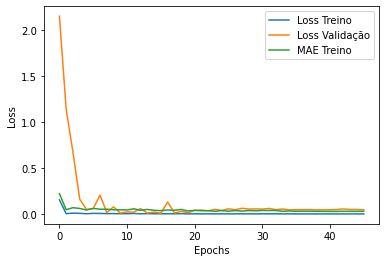

Tempo de treino: 2.408051057656606 minutos


'TRAINING set. Loss = 0.012876380234956741 , MAE = 0.08072421699762344'

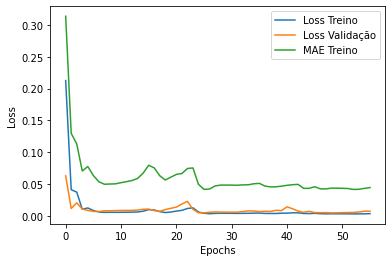

Tempo de treino: 0.8716621478398641 minutos


'TRAINING set. Loss = 0.01066531427204609 , MAE = 0.08395885676145554'

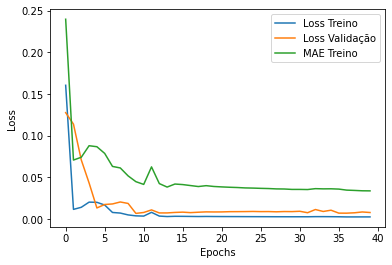

Tempo de treino: 0.711651619275411 minutos


In [ ]:
all_results = pd.DataFrame(columns=["model_type","model","stock","unit","optimizer", "batch_size", "loss","mae"])

TimeSteps = 10
TotalFeatures = 1
epochs = 60
i = 1
times_exec = 3

# model_type	stock	    unit	optimizer	batch_size	loss	    mae
# model_v1		VALE3.SA	128	  Adam	    16	        0.016814	0.101011
# model_v1		USIM5.SA	64	  Adam	    32	        0.004581	0.052404
# model_v1		ITSA4.SA	64	  Adam	    16	        0.002537	0.040484

result_all_best = pd.DataFrame(columns=["model_type", "stock","unit","optimizer", "batch_size", "loss","mae"])
result_all_best = result_all_best.append({'model_type':'model_v1', 'stock':'VALE3.SA', 'unit': 128, 'optimizer': 'Adam', 'batch_size': 16, 'loss': 0.016814, 'mae': 0.101011}, ignore_index=True)
result_all_best = result_all_best.append({'model_type':'model_v1', 'stock':'USIM5.SA', 'unit': 64,  'optimizer': 'Adam', 'batch_size': 32, 'loss': 0.004581, 'mae': 0.052404}, ignore_index=True)
result_all_best = result_all_best.append({'model_type':'model_v1', 'stock':'ITSA4.SA', 'unit': 64,  'optimizer': 'Adam', 'batch_size': 16, 'loss': 0.002537, 'mae': 0.040484}, ignore_index=True)

dic_scaler = {}

if result_all_best is not None:
  for index, item in result_all_best.iterrows():
    scaler, X_train, X_test, y_train, y_test = preprocess(df, item['stock'], 10, len(data_teste))
    dic_scaler[item['stock']] = scaler
    inittime = time()
    m, h = model_type(item['model_type'], unit=item['unit'], optimizer=item['optimizer'], X=X_train, y=y_train, epochs=epochs, batch_size=item['batch_size'])
    endtime = time()
    print(f'Tempo de treino: {(endtime-inittime)/60} minutos' )
    y_pred = m.predict(X_test)
    score = m.evaluate(X_test, y_test, batch_size=32, verbose=0)
    all_results = all_results.append({'model_type': item['model_type'], 'model':m, 'stock':item['stock'],'unit':item['unit'], \
      'optimizer':item['optimizer'], "batch_size":item['batch_size'], "loss":score[0], "mae":score[1]}, ignore_index=True)
    
else:

  for times in range(times_exec):
    for model_type_str in ['model_v1', 'model_v2']:
      for stock in arr_acoes:
        scaler, X_train, X_test, y_train, y_test = preprocess(df, stock, 10, len(data_teste))
        dic_scaler[stock] =scaler
        for optimizer in ['Adam']:
          for unit in [64, 128]: # for unit in [64, 128]:
            for batch_size in [16, 32]:
              inittime = time()
              m, h = model_type(model_type_str, unit=unit, optimizer=optimizer, X=X_train, y=y_train, epochs=epochs, batch_size=batch_size)
              endtime = time()
              print(f'Tempo de treino: {(endtime-inittime)/60} minutos' )
              y_pred = m.predict(X_test)
              score = m.evaluate(X_test, y_test, batch_size=32, verbose=0)
              all_results = all_results.append({'model_type': model_type_str, 'model':m, 'stock':stock,'unit':unit, 'optimizer':optimizer, 
                                            "loss":score[0], "mae":score[1], "batch_size":batch_size}, ignore_index=True)

Teste de desempenho de todas variações em parâmetros

---


In [ ]:
all_results

,model_type,model,stock,unit,optimizer,batch_size,loss,mae
0,model_v1,<keras.engine.sequential.Sequential object at ...,VALE3.SA,128,Adam,16,0.041186,0.184277
1,model_v1,<keras.engine.sequential.Sequential object at ...,USIM5.SA,64,Adam,32,0.001608,0.038178
2,model_v1,<keras.engine.sequential.Sequential object at ...,ITSA4.SA,64,Adam,16,0.010580,0.093768



Os melhores parâmetros encontrados para o modelo 1 de cada ação tem como similaridade a mesma quantidade de neurônios e a taxa de learning rate.

---


In [ ]:
# saved
# result_all_best = None

result_all_best_arr = []
for stock in arr_acoes:
  best = all_results[all_results["stock"] == f"{stock}"].sort_values("mae", ascending=True).head(1)
  result_all_best_arr.append(best)

  mod = best["model"]
  mod = mod.iloc[0]
  mod.save(f"mod_{stock}")

result_all_best = pd.concat(result_all_best_arr)

result_all_best

INFO:tensorflow:Assets written to: mod_VALE3.SA/assets


INFO:tensorflow:Assets written to: mod_USIM5.SA/assets


INFO:tensorflow:Assets written to: mod_USIM5.SA/assets


INFO:tensorflow:Assets written to: mod_ITSA4.SA/assets


INFO:tensorflow:Assets written to: mod_ITSA4.SA/assets


,model_type,model,stock,unit,optimizer,batch_size,loss,mae
0,model_v1,<keras.engine.sequential.Sequential object at ...,VALE3.SA,128,Adam,16,0.041186,0.184277
1,model_v1,<keras.engine.sequential.Sequential object at ...,USIM5.SA,64,Adam,32,0.001608,0.038178
2,model_v1,<keras.engine.sequential.Sequential object at ...,ITSA4.SA,64,Adam,16,0.010580,0.093768


## Avaliação

### Treinamento

### Boxplot

Dataset para construção do Boxplot e Swarmplot

---

In [ ]:
aval = pd.DataFrame()

for index, setup in result_all_best.iterrows():

  scaler, X_train, X_test, y_train, y_test = preprocess(df, setup["stock"], 10, len(data_teste))

  mod = tf.keras.models.load_model(f'mod_{setup["stock"]}')
  y_pred = mod.predict(X_test)
  y_pred = scaler.inverse_transform(y_pred)
  y_real = scaler.inverse_transform(y_test)
 
  aval[f'{setup["stock"]}'] = y_pred[:,0]
  aval[f'{setup["stock"]}_Real'] = y_real[:,0]

  

Figura com boxplot e swarmplot para os melhores modelos

---

Text(0.5, 1.0, 'Performance Boxplot')

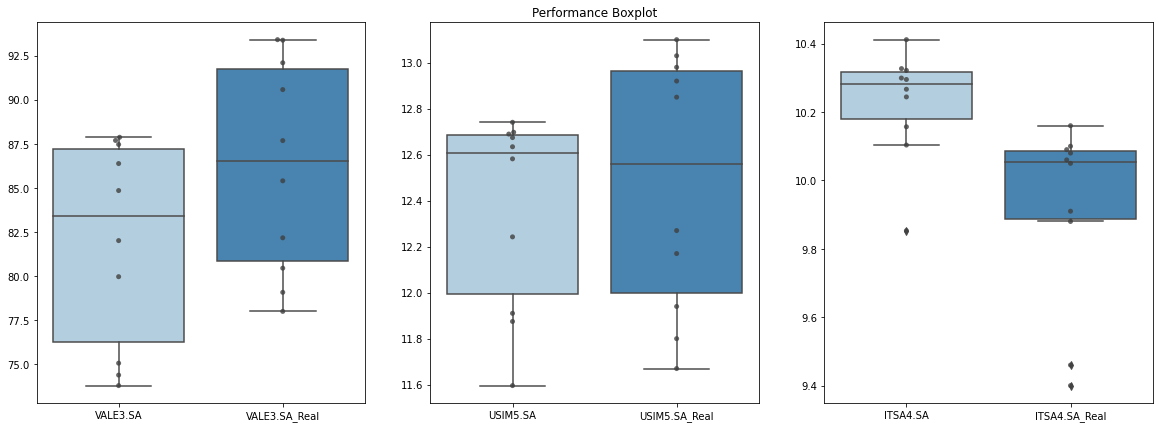

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7), nrows=1, ncols=3)
sns.boxplot(data=aval.filter(regex='VALE3*'), dodge=False, palette="Blues", ax=ax[0])
sns.swarmplot(data=aval.filter(regex='VALE3*'), color=".25", alpha=0.8, ax=ax[0])

sns.boxplot(data=aval.filter(regex='USIM5*'), dodge=False, palette="Blues", ax=ax[1])
sns.swarmplot(data=aval.filter(regex='USIM5*'), color=".25", alpha=0.8, ax=ax[1])

sns.boxplot(data=aval.filter(regex='ITSA4*'), dodge=False, palette="Blues", ax=ax[2])
sns.swarmplot(data=aval.filter(regex='ITSA4*'), color=".25", alpha=0.8, ax=ax[2])

ax[1].set_title("Performance Boxplot")

### Métricas

### Performance

Figura predição por ação

In [ ]:
def plot_aval(aval):
  fig, ax = plt.subplots(figsize=(30, 12), nrows=1, ncols=3)

  # Coluna 1
  sns.lineplot(data=aval.filter(regex='VALE3*'), palette="inferno", ax=ax[0], hue_order=['VALE3.SA_Real' ,'VALE3.SA'])
  ax[0].set_xlabel('Dias')
  ax[0].set_title('VALE3')

  # Coluna 2
  sns.lineplot(data=aval.filter(regex='ITSA4*'), palette="inferno", ax=ax[1], hue_order=['ITSA4.SA_Real', 'ITSA4.SA'])
  ax[1].set_xlabel('Dias')
  ax[1].set_title('ITSA4')

  # Coluna 3
  sns.lineplot(data=aval.filter(regex='USIM5*'), palette="inferno", ax=ax[2], hue_order=['USIM5.SA_Real', 'USIM5.SA'])
  ax[2].set_xlabel('Dias')
  ax[2].set_title('USIM5')


    VALE3.SA  VALE3.SA_Real   USIM5.SA  USIM5.SA_Real   ITSA4.SA  \
0  87.868317      93.370003  12.689550          13.03  10.411622   
1  87.460136      93.400002  12.697460          12.98  10.327023   
2  87.689056      92.089996  12.674262          12.92  10.299430   
3  86.378731      90.570000  12.634399          12.85  10.295182   
4  84.848534      87.680000  12.581820          13.10  10.321829   
5  82.011696      85.400002  12.740779          12.27  10.266606   
6  79.967171      80.449997  12.242573          11.94  10.244212   
7  75.064491      79.080002  11.874685          12.17  10.156881   
8  74.389381      78.000000  11.910111          11.67  10.103449   
9  73.793739      82.169998  11.595884          11.80   9.852964   

   ITSA4.SA_Real  
0          10.08  
1          10.09  
2          10.10  
3          10.16  
4          10.05  
5          10.06  
6           9.91  
7           9.88  
8           9.46  
9           9.40  


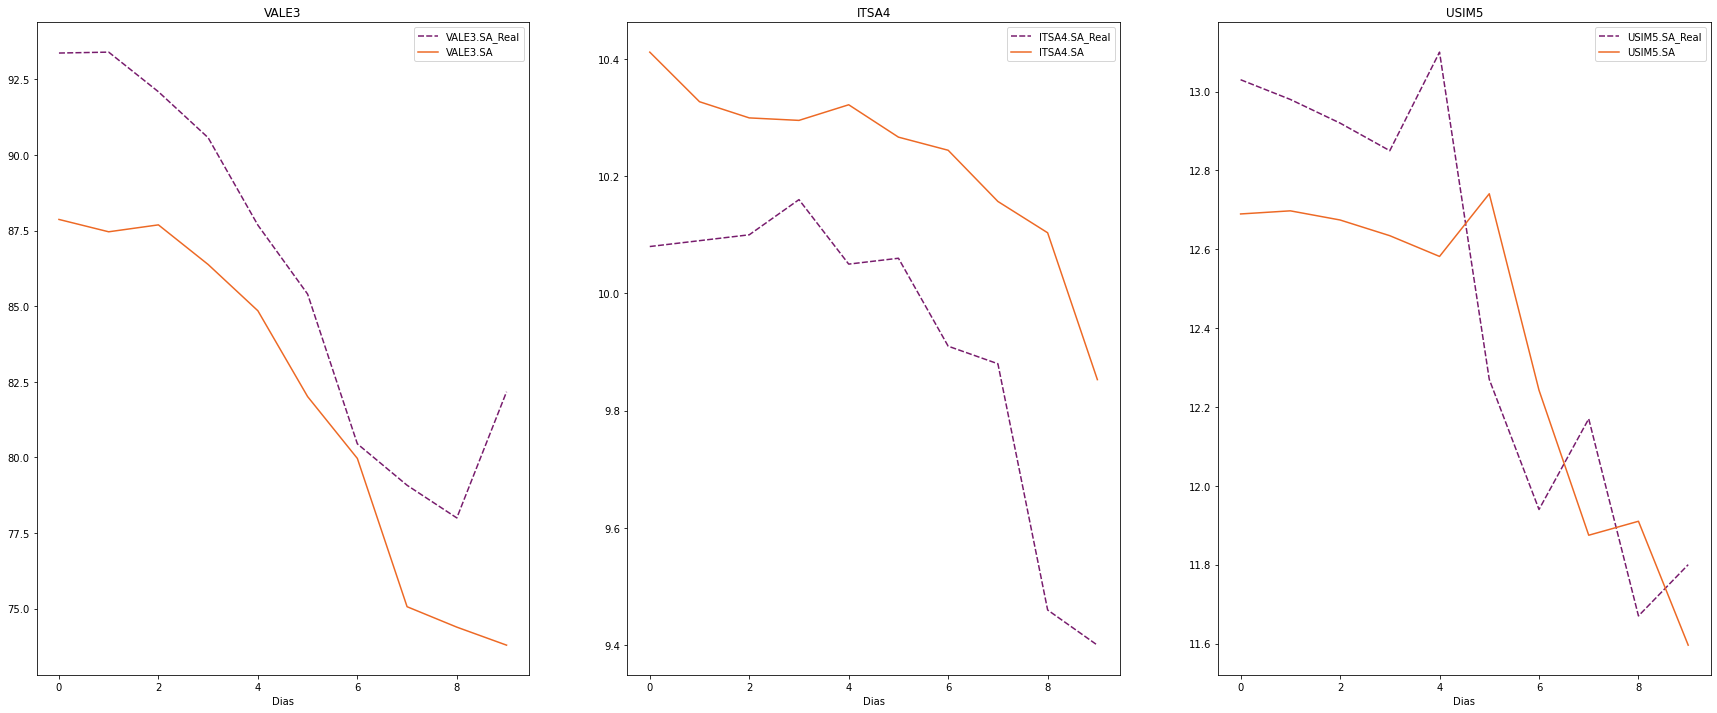

In [ ]:
plot_aval(aval)
print(aval)

In [ ]:
def predict(close_data, num_prediction, model, look_back, timestep, scaler):
    # prediction_list = close_data[-look_back:]
    prediction_list = close_data
    prediction_list_rescaled = []
    
    # TODO - Talvez o loop não faça sentido. Ao inserir a saída na entrada, precisa fazer o reshape.
    # So esta funcinando com 1 predição, que talvez seja o correto. 
    # Aumentando o tamanho do look_back, a predição muda pros dias comuns, ex:
    #, os 10 primeiros dias de predição de look_back = 10 são diferentes dos 10 
    # primeiros dias de predição para look_back = 20

    prediction_list = prediction_list[-look_back:,:,:]
    print("x05 = ", prediction_list)
    print("x05 = ", prediction_list.shape)
    prediction_list = prediction_list.reshape((look_back * timestep))
    print("x1 = ", prediction_list)
    print("x05 = ", prediction_list.shape)
    for _ in range(num_prediction):
        x = prediction_list[-look_back * timestep:]
        print("x2 = ", x)
        print("x2 = ", x.shape)
        x = x.reshape((look_back, timestep, 1))
        print("x3 = ", x)
        print("x3 = ", x.shape)
       
        out_full = model.predict(x)
        print("out = ", out_full)
        print("out_full.shape = ", out_full.shape)
        out = scaler.inverse_transform(out_full)
        out_full = out_full[0:look_back,0]
        out = out[0:look_back,0]
        prediction_list = np.append(prediction_list, out_full)
        print("prediction_list = ", prediction_list)
        prediction_list_rescaled = np.append(prediction_list_rescaled, out)
        # print("prediction_list_rescaled = ", prediction_list_rescaled)

    # prediction_list = prediction_list[look_back-1:]
    # prediction_list_rescaled = prediction_list_rescaled[look_back-1:]
    return prediction_list_rescaled

    
def predict_dates(dataset, num_prediction):
    last_date = dataset.index.values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates


aval_forecast = pd.DataFrame()
# num_prediction = len(data_teste)*2
num_prediction = 20
Timesteps = 10
# test_sizee = len(data_teste)
test_sizee = 1000
look_back = 1
for index, setup in result_all_best.iterrows():
  
  # if setup["stock"] != "VALE3.SA":
  #   continue

  # print(data_teste[[setup["stock"]]].head(10))
  scaler, X_train, X_test, y_train, y_test = preprocess(df, setup["stock"], Timesteps, test_sizee)
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  mod = tf.keras.models.load_model(f'mod_{setup["stock"]}')

  forecast_list = predict(X_test, num_prediction, mod, look_back, Timesteps, scaler)
  forecast_dates = predict_dates(data_teste, num_prediction)
  print("dates = ", forecast_dates)

  aval_forecast[f'{setup["stock"]}'] = forecast_list
  aval_all = pd.concat([aval, aval_forecast], ignore_index=True)

plot_aval(aval)
plot_aval(aval_forecast)
plot_aval(aval_all)
# print(aval)
# print(aval_forecast)
# print(aval_all)


In [ ]:

scaler, X_train, X_test, y_train, y_test = preprocess(df, "VALE3.SA", 10, 15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5582, 10, 1), (15, 10, 1), (5582, 1), (15, 1))

Painel geral de avaliação da performance completa dos modelos por ação e versão



1.   Linha 1 Plot de densidade por frequência entre previsto e real
2.   Linha 2 Plot de linha previsto e real
3.   Linha 3 Plot de regressão linear para previsto e real

---


KeyError: ignored

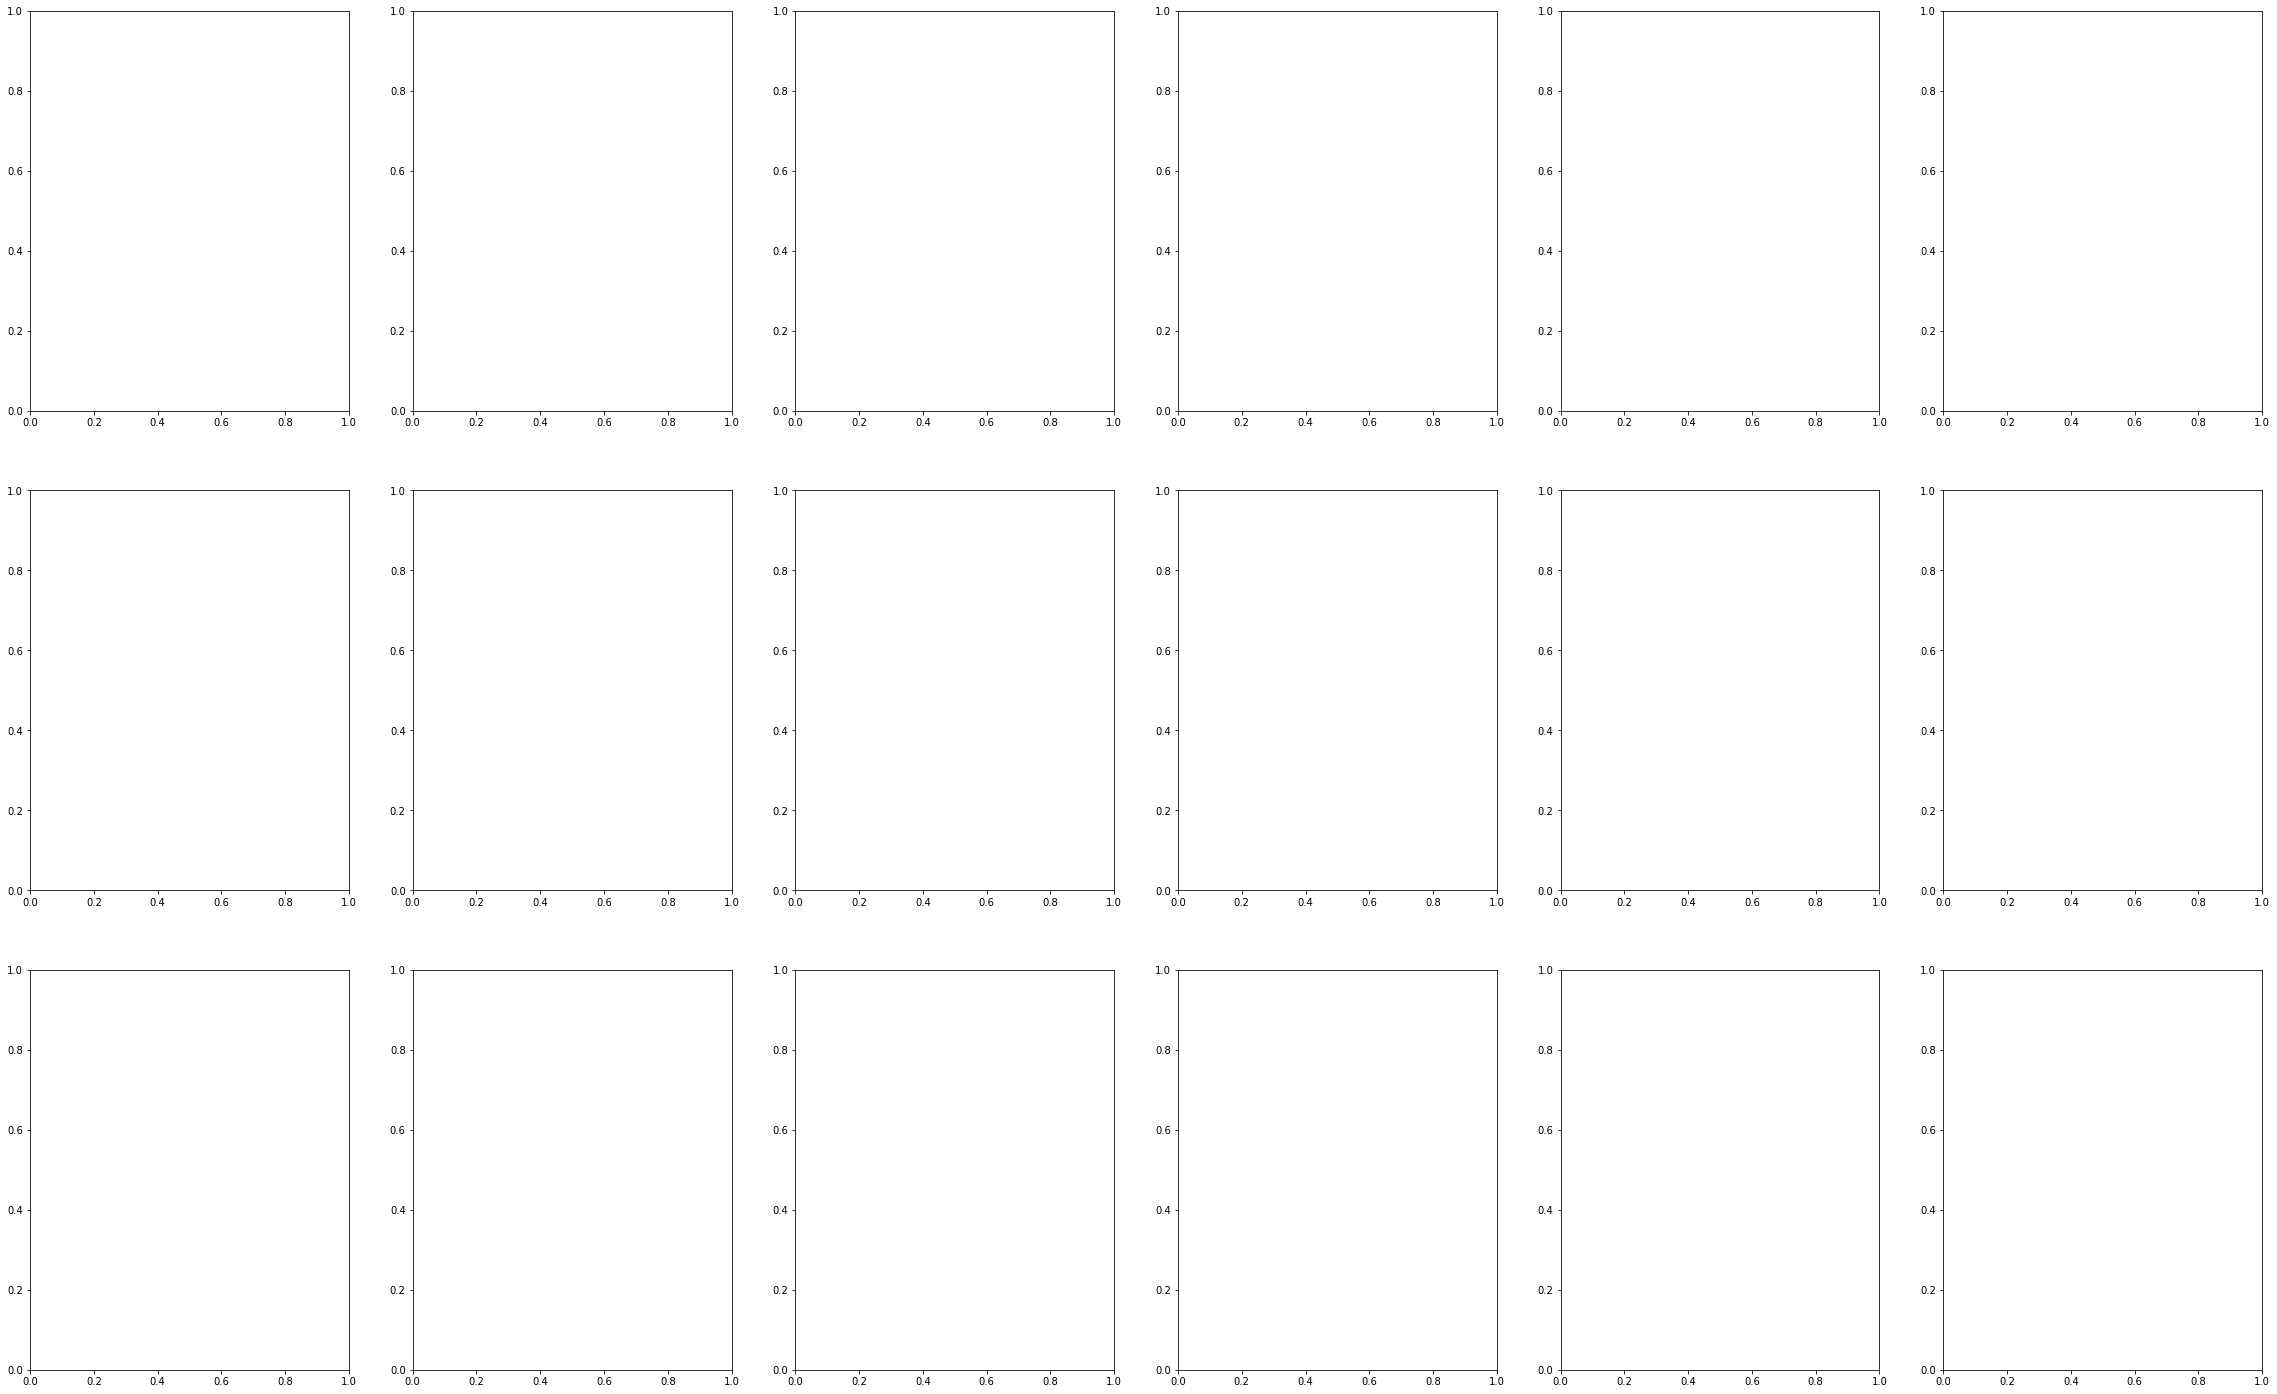

In [ ]:
fig, ax = plt.subplots(figsize=(40, 25), nrows=3, ncols=6)

#### LINHA 1

sns.kdeplot(data=aval[['ITSA4.SA_Real', 'ITSA4.SA_128_v2']], ax=ax[0][0], bw_adjust=.2, palette=["black", 'blue'])
ax[0][0].set_xlabel('AveragePrice')
ax[0][0].set_title('ITSA4.SA_128_v2')
ax[0][0].set_ylim([0, 0.11])

sns.kdeplot(data=aval[['ITSA4.SA_Real', 'ITSA4.SA_64_v1']], ax=ax[0][1], bw_adjust=.2, palette=["black", 'blue'])
ax[0][1].set_xlabel('AveragePrice')
ax[0][1].set_title('ITSA4.SA_64_v1')
ax[0][1].set_ylim([0, 0.11])

sns.kdeplot(data=aval[['USIM5.SA_Real', 'USIM5.SA_128_v2']], ax=ax[0][2], bw_adjust=.2, palette=["black", 'blue'])
ax[0][2].set_xlabel('AveragePrice')
ax[0][2].set_title('USIM5.SA_128_v2')
ax[0][2].set_ylim([0, 0.12])

sns.kdeplot(data=aval[['USIM5.SA_Real', 'USIM5.SA_64_v1']], ax=ax[0][3], bw_adjust=.2, palette=["black", 'blue'])
ax[0][3].set_xlabel('AveragePrice')
ax[0][3].set_title('USIM5.SA_64_v1')
ax[0][3].set_ylim([0, 0.12])
ax[0][3].set_xlim([27, 40])

sns.kdeplot(data=aval[['VALE3.SA_Real', 'VALE3.SA_128_v2']], ax=ax[0][4], bw_adjust=.2, palette=["black", 'blue'])
ax[0][4].set_xlabel('AveragePrice')
ax[0][4].set_title('VALE3.SA_128_v2')
ax[0][4].set_ylim([0, 0.24])
ax[0][4].set_xlim([11, 21])

sns.kdeplot(data=aval[['VALE3.SA_Real', 'VALE3.SA_128_v1']], ax=ax[0][5], bw_adjust=.2, palette=["black", 'blue'])
ax[0][5].set_xlabel('AveragePrice')
ax[0][5].set_title('VALE3.SA_128_v1')
ax[0][5].set_ylim([0, 0.24])
ax[0][5].set_xlim([11, 21])

#### LINHA 2

sns.lineplot(data=aval[['ITSA4.SA_Real', 'ITSA4.SA_128_v2']], palette="inferno", ax=ax[1][0], hue_order=['ITSA4.SA_Real' ,'ITSA4.SA_128_v2'])
ax[1][0].set_xlabel('Dias')
ax[1][0].set_title('ITSA4.SA_128_v2')
ax[1][0].set_ylim([18, 32])

sns.lineplot(data=aval[['ITSA4.SA_Real', 'ITSA4.SA_64_v1']], palette="inferno", ax=ax[1][1], hue_order=['ITSA4.SA_Real' ,'ITSA4.SA_64_v1'])
ax[1][1].set_xlabel('Dias')
ax[1][1].set_title('ITSA4.SA_64_v1')
ax[1][1].set_ylim([18, 32])

sns.lineplot(data=aval[['USIM5.SA_Real', 'USIM5.SA_128_v2']], palette="inferno", ax=ax[1][2], hue_order=['USIM5.SA_Real' ,'USIM5.SA_128_v2'])
ax[1][2].set_xlabel('Dias')
ax[1][2].set_title('USIM5.SA_128_v2')
ax[1][2].set_ylim([27, 41])

sns.lineplot(data=aval[['USIM5.SA_Real', 'USIM5.SA_64_v1']], palette="inferno", ax=ax[1][3], hue_order=['USIM5.SA_Real' ,'USIM5.SA_64_v1'])
ax[1][3].set_xlabel('Dias')
ax[1][3].set_title('USIM5.SA_64_v1')
ax[1][3].set_ylim([27, 41])

sns.lineplot(data=aval[['VALE3.SA_Real', 'VALE3.SA_128_v2']], palette="inferno", ax=ax[1][4], hue_order=['VALE3.SA_Real' ,'VALE3.SA_128_v2'])
ax[1][4].set_xlabel('Dias')
ax[1][4].set_title('VALE3.SA_128_v2')
ax[1][4].set_ylim([12, 20])

sns.lineplot(data=aval[['VALE3.SA_Real', 'VALE3.SA_128_v1']], palette="inferno", ax=ax[1][5], hue_order=['VALE3.SA_Real' ,'VALE3.SA_128_v1'])
ax[1][5].set_xlabel('Dias')
ax[1][5].set_title('VALE3.SA_128_v1')
ax[1][5].set_ylim([12, 20])

#### LINHA 3 

sns.regplot(data=aval,x="ITSA4.SA_Real", y="ITSA4.SA_Real", scatter_kws={"color": "white"}, line_kws={'color': 'red'}, ax=ax[2][0])
sns.regplot(data=aval,x="ITSA4.SA_Real", y="ITSA4.SA_128_v2", scatter_kws={"color": "orange"}, line_kws={'color': 'blue'}, ax=ax[2][0])
ax[2][0].set_ylim([18, 32])
ax[2][0].set_xlim([18, 32])

sns.regplot(data=aval,x="ITSA4.SA_Real", y="ITSA4.SA_Real", scatter_kws={"color": "white"}, line_kws={'color': 'red'}, ax=ax[2][1])
sns.regplot(data=aval,x="ITSA4.SA_Real", y="ITSA4.SA_64_v1", scatter_kws={"color": "orange"}, line_kws={'color': 'blue'}, ax=ax[2][1])
ax[2][1].set_ylim([18, 32])
ax[2][1].set_xlim([18, 32])

sns.regplot(data=aval,x="USIM5.SA_Real", y="USIM5.SA_Real", scatter_kws={"color": "white"}, line_kws={'color': 'red'}, ax=ax[2][2])
sns.regplot(data=aval,x="USIM5.SA_Real", y="USIM5.SA_128_v2", scatter_kws={"color": "orange"}, line_kws={'color': 'blue'}, ax=ax[2][2])
ax[2][2].set_ylim([27, 41])
ax[2][2].set_ylim([27, 41])

sns.regplot(data=aval,x="USIM5.SA_Real", y="USIM5.SA_Real", scatter_kws={"color": "white"}, line_kws={'color': 'red'}, ax=ax[2][3])
sns.regplot(data=aval,x="USIM5.SA_Real", y="USIM5.SA_64_v1", scatter_kws={"color": "orange"}, line_kws={'color': 'blue'}, ax=ax[2][3])
ax[2][3].set_ylim([27, 41])
ax[2][3].set_ylim([27, 41])

sns.regplot(data=aval,x="VALE3.SA_Real", y="VALE3.SA_Real", scatter_kws={"color": "white"}, line_kws={'color': 'red'}, ax=ax[2][4])
sns.regplot(data=aval,x="VALE3.SA_Real", y="VALE3.SA_128_v2", scatter_kws={"color": "orange"}, line_kws={'color': 'blue'}, ax=ax[2][4])
ax[2][4].set_ylim([12, 20])
ax[2][4].set_ylim([12, 20])

sns.regplot(data=aval,x="VALE3.SA_Real", y="VALE3.SA_Real", scatter_kws={"color": "white"}, line_kws={'color': 'red'}, ax=ax[2][5])
sns.regplot(data=aval,x="VALE3.SA_Real", y="VALE3.SA_128_v1", scatter_kws={"color": "orange"}, line_kws={'color': 'blue'}, ax=ax[2][5])
ax[2][5].set_ylim([12, 20])
ax[2][5].set_ylim([12, 20])

Métricas de desempenho geral para len(data_teste) registros de fechamento por ação

---

In [ ]:
# print("MAE  VALE3 128 v2:", metrics.mean_absolute_error(aval['VALE3.SA_Real'], aval['VALE3.SA_128_v2']))
# print("MSE  VALE3 128 v2:", metrics.mean_squared_error(aval["VALE3.SA_Real"], aval['VALE3.SA_128_v2']))
# print("R2   VALE3 128 v2:", metrics.r2_score(aval["VALE3.SA_Real"], aval['VALE3.SA_128_v2']))
# print('')
# print("MAE  VALE3  128:", metrics.mean_absolute_error(aval['VALE3.SA_Real'], aval['VALE3.SA_128_v1']))
# print("MSE  VALE3  128:", metrics.mean_squared_error(aval["VALE3.SA_Real"], aval['VALE3.SA_128_v1']))
# print("R2   VALE3  128:", metrics.r2_score(aval["VALE3.SA_Real"], aval['VALE3.SA_128_v1']))
# print('\n*******************')
# print("MAE  USIM5 128:", metrics.mean_absolute_error(aval['USIM5.SA_Real'], aval['USIM5.SA_128_v2']))
# print("MSE  USIM5 128:", metrics.mean_squared_error(aval["USIM5.SA_Real"], aval['USIM5.SA_128_v2']))
# print("R2   USIM5 128:", metrics.r2_score(aval["USIM5.SA_Real"], aval['USIM5.SA_128_v2']))
# print('')
# print("MAE  USIM5  64:", metrics.mean_absolute_error(aval['USIM5.SA_Real'], aval['USIM5.SA_64_v1']))
# print("MSE  USIM5  64:", metrics.mean_squared_error(aval["USIM5.SA_Real"], aval['USIM5.SA_64_v1']))
# print("R2   USIM5  64:", metrics.r2_score(aval["USIM5.SA_Real"], aval['USIM5.SA_64_v1']))
# print('\n*******************')
# print("MAE  ITSA4 128:", metrics.mean_absolute_error(aval['ITSA4.SA_Real'], aval['ITSA4.SA_128_v2']))
# print("MSE  ITSA4 128:", metrics.mean_squared_error(aval["ITSA4.SA_Real"], aval['ITSA4.SA_128_v2']))
# print("R2   ITSA4 128:", metrics.r2_score(aval["ITSA4.SA_Real"], aval['ITSA4.SA_128_v2']))
# print('')
# print("MAE  ITSA4  64:", metrics.mean_absolute_error(aval['ITSA4.SA_Real'], aval['ITSA4.SA_64_v1']))
# print("MSE  ITSA4  64:", metrics.mean_squared_error(aval["ITSA4.SA_Real"], aval['ITSA4.SA_64_v1']))
# print("R2   ITSA4  64:", metrics.r2_score(aval["ITSA4.SA_Real"], aval['ITSA4.SA_64_v1']))

# Teste

## Data

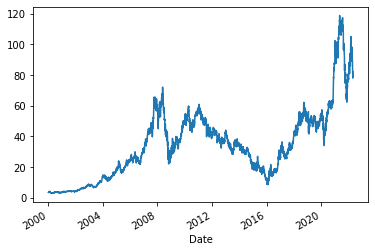

In [ ]:
df['VALE3.SA'].plot()

In [ ]:
ticket = 'VALE3.SA'
data = df[[ticket]]

scaler = MinMaxScaler()
scaler.fit(data)
datascaled = scaler.transform(data)
datascaled = pd.DataFrame(datascaled, columns=[ticket])

# Corte entre treino, teste e validação

n = len(datascaled)
train = datascaled[0:int(n*0.8)]
train = np.array(train['VALE3.SA'])
train = train.reshape(len(train), 1)
valid = datascaled[int(n*0.8):int(n*0.98)]
valid = np.array(valid['VALE3.SA'])
valid = valid.reshape(len(valid), 1)

test  = datascaled[int(n*0.98):]
test = np.array(test['VALE3.SA'])
test = test.reshape(len(test), 1)

print(f'{train.shape, valid.shape, test.shape}')

((4485, 1), (1009, 1), (113, 1))


In [ ]:
# QUANDO O BATCH_SIZE NO PRÉ PROCESSAMENTO É MAIOR QUE 1
BATCH_SIZE = 2
SEQ_LEN = 5

gen_train = TimeseriesGenerator(train, train, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)
gen_valid = TimeseriesGenerator(valid, valid, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)
gen_test  = TimeseriesGenerator(test,  test, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)

for i in range(len(gen_train)):
	x, y = gen_train[i]
	print('%s => %s' % (x, y));break

[[[0.00575275]
  [0.00503365]
  [0.00503365]
  [0.00503365]
  [0.00611229]]

 [[0.00503365]
  [0.00503365]
  [0.00503365]
  [0.00611229]
  [0.00862912]]] => [[0.00862912]
 [0.00870103]]


In [ ]:
# QUANDO O BATCH_SIZE NO PRÉ PROCESSAMENTO É IGUAL A 1
BATCH_SIZE = 1
SEQ_LEN = 5

gen_train = TimeseriesGenerator(train, train, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)
gen_valid = TimeseriesGenerator(valid, valid, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)
gen_test  = TimeseriesGenerator(test,  test, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)

for i in range(len(gen_train)):
	x, y = gen_train[i]
	print('%s => %s' % (x, y));break

[[[0.00575275]
  [0.00503365]
  [0.00503365]
  [0.00503365]
  [0.00611229]]] => [[0.00862912]]


## Model

In [ ]:
unit = 64
epochs = 10

mod = Sequential()
mod.add(LSTM(int(unit), activation='relu', input_shape=x.shape[1:], return_sequences=False))
mod.add(Dense(1))
mod.add(Activation('linear'))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=30, mode='min')

adam = tf.keras.optimizers.Adam()
mod.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=adam,
              metrics=[tf.metrics.MeanAbsoluteError()])

mod.summary()

hist = mod.fit(gen_train, batch_size=32, 
                epochs=epochs, validation_data=gen_valid,
                callbacks=[callback], verbose=2, shuffle=False)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
 activation_4 (Activation)   (None, 1)                 0         
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4480/4480 - 19s - loss: 2.0417e-04 - mean_absolute_error: 0.0098 - val_loss: 0.0975 - val_mean_absolute_error: 0.2527 - 19s/epoch - 4ms/step
Epoch 2/10
4480/4480 - 17s - loss: 2.9981e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0781 - val_mean_absolute_error: 0.2240 - 17s/epoch - 4ms/step
Epoch 3/10

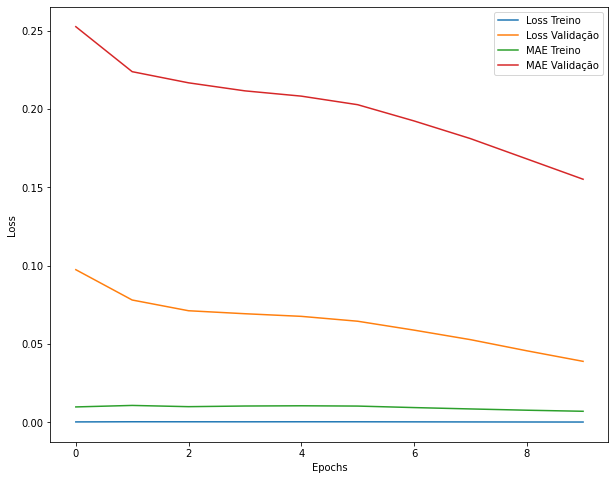

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(hist.history['loss'], label="Loss Treino")
plt.plot(hist.history['val_loss'], label="Loss Validação")
plt.plot(hist.history['mean_absolute_error'], label="MAE Treino")
plt.plot(hist.history['val_mean_absolute_error'], label="MAE Validação")

plt.legend()
plt.show()

In [ ]:
pred = mod.predict(gen_test, verbose=0, batch_size=BATCH_SIZE)
real = y_test[SEQ_LEN:]

real = scaler.inverse_transform(real)
pred = scaler.inverse_transform(pred)

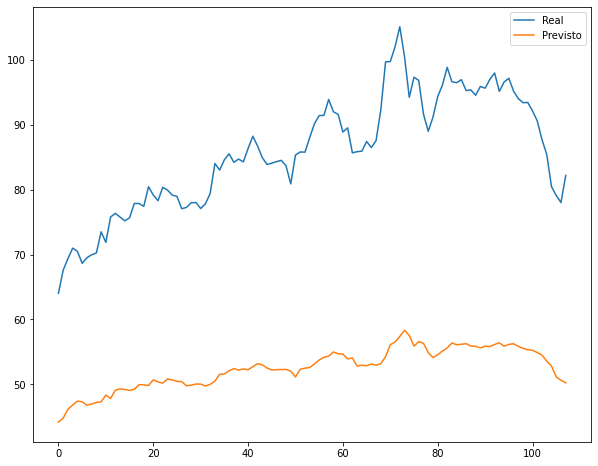

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(real, label="Real")
plt.plot(pred, label="Previsto")

plt.legend()
plt.show()

## Extended Predition 1

In [ ]:
dict = {'VALE3.SA': -1}
future = data[-5:].copy()
future.reset_index(drop=True, inplace=True)
future = future.append(dict, ignore_index=1 ) 
print(future)

future = np.asarray(future[ticket])
future = future.reshape(len(future), 1)
future = scaler.transform(future)
future

    VALE3.SA
0  85.400002
1  80.449997
2  79.080002
3  78.000000
4  82.169998
5  -1.000000


array([[ 0.71247771],
       [ 0.66976353],
       [ 0.65794168],
       [ 0.64862221],
       [ 0.68460563],
       [-0.03307829]])

In [ ]:
# X_fut, y_fut = preprocess(future, ticket)

gen_fut = TimeseriesGenerator(future, future, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)

for i in range(len(gen_fut)):
	x, y = gen_fut[i]
	print('%s => %s' % (x, y));break

[[[0.71247771]
  [0.66976353]
  [0.65794168]
  [0.64862221]
  [0.68460563]]] => [[-0.03307829]]


In [ ]:
fut_predict = []
fut_real    = []

pred = mod.predict(gen_fut, verbose=0, batch_size=BATCH_SIZE)
real = future[SEQ_LEN:]

real = scaler.inverse_transform(real)
pred = scaler.inverse_transform(pred)
real, pred

(array([[-1.]]), array([[51.320858]], dtype=float32))

## Extended Predition 2

In [ ]:
future = data[-4:].copy()
future.reset_index(drop=True, inplace=True)

# Adicionando o valor previsto como imput
dict = {'VALE3.SA': pred[0][0]}
future = future.append(dict, ignore_index=1 ) 

# Adicionando valor aleatorio para o desconhecido
dict = {'VALE3.SA': -1}
future = future.append(dict, ignore_index=1 ) 
print(future)

future = np.asarray(future[ticket])
future = future.reshape(len(future), 1)
future = scaler.transform(future)
future

    VALE3.SA
0  80.449997
1  79.080002
2  78.000000
3  82.169998
4  51.320858
5  -1.000000


array([[ 0.66976353],
       [ 0.65794168],
       [ 0.64862221],
       [ 0.68460563],
       [ 0.41840469],
       [-0.03307829]])

In [ ]:
gen_fut = TimeseriesGenerator(future, future, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)

for i in range(len(gen_fut)):
	x, y = gen_fut[i]
	print('%s => %s' % (x, y));break

[[[0.66976353]
  [0.65794168]
  [0.64862221]
  [0.68460563]
  [0.41840469]]] => [[-0.03307829]]


In [ ]:
pred = mod.predict(gen_fut, verbose=0, batch_size=BATCH_SIZE)
real = future[SEQ_LEN:]

real = scaler.inverse_transform(real)
pred = scaler.inverse_transform(pred)
real, pred

(array([[-1.]]), array([[38.67435]], dtype=float32))

## Extended Predition 3

In [ ]:
future = data[-4:].copy()
future.reset_index(drop=True, inplace=True)

# Adicionando o valor MANUAL
dict = {'VALE3.SA': 150}
future = future.append(dict, ignore_index=1 ) 

# Adicionando valor aleatorio para o desconhecido
dict = {'VALE3.SA': -1}
future = future.append(dict, ignore_index=1 ) 
print(future)

future = np.asarray(future[ticket])
future = future.reshape(len(future), 1)

future = scaler.transform(future)
future

     VALE3.SA
0   80.449997
1   79.080002
2   78.000000
3   82.169998
4  150.000000
5   -1.000000


array([[ 0.66976353],
       [ 0.65794168],
       [ 0.64862221],
       [ 0.68460563],
       [ 1.26991887],
       [-0.03307829]])

In [ ]:
# X_fut, y_fut = preprocess(future, ticket)

gen_fut = TimeseriesGenerator(future, future, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)

for i in range(len(gen_fut)):
	x, y = gen_fut[i]
	print('%s => %s' % (x, y));break

[[[0.66976353]
  [0.65794168]
  [0.64862221]
  [0.68460563]
  [1.26991887]]] => [[-0.03307829]]


In [ ]:
pred = mod.predict(gen_fut, verbose=0, batch_size=BATCH_SIZE)
real = future[SEQ_LEN:]

real = scaler.inverse_transform(real)
pred = scaler.inverse_transform(pred)
real, pred

(array([[-1.]]), array([[67.40911]], dtype=float32))

## Extended Predition 4

In [ ]:
# Escolhendo toda serie de entrada

# future = np.asarray(np.array([65, 66, 80, 80, 82, 89]))
future = np.asarray(np.array([22, 25, 20, 33, 29, 29]))
future = future.reshape(len(future), 1)
future = scaler.transform(future)
future

array([[0.16539147],
       [0.19127884],
       [0.14813323],
       [0.2603118 ],
       [0.22579532],
       [0.22579532]])

In [ ]:
# X_fut, y_fut = preprocess(future, ticket)

gen_fut = TimeseriesGenerator(future, future, SEQ_LEN, sampling_rate=1, batch_size=BATCH_SIZE, shuffle=False)

for i in range(len(gen_fut)):
	x, y = gen_fut[i]
	print('%s => %s' % (x, y));break

[[[0.16539147]
  [0.19127884]
  [0.14813323]
  [0.2603118 ]
  [0.22579532]]] => [[0.22579532]]


In [ ]:
pred = mod.predict(gen_fut, verbose=0, batch_size=BATCH_SIZE)
real = future[SEQ_LEN:]

real = scaler.inverse_transform(real)
pred = scaler.inverse_transform(pred)
real, pred

(array([[29.]]), array([[30.631079]], dtype=float32))